We are running the following program to check if the following hypothesis;

Sales Rank of a particular product is dependent on the sentiment polarity and number of words in a review. 

In [4]:
#Install the dependencies from the respective packages

import numpy as np
import pandas as pd
import sys
 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import scale

We will be calculating the feature importance by running an Extra Trees classifier from the Scikit-Learn library. An Extra Trees Classifier fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

['\ufeffField_1', 'asin', 'description', 'title', 'imUrl', 'related', 'salesRank', 'categories', 'price', 'brand', 'salesRank1', 'salesRank2', 'rowID', 'reviewerID', 'Right_asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewText', 'overall', 'reviewTime', 'summary', 'sentimentPolarity', 'sentimentSubjectivity', 'sentences', 'sentenceCount', 'wordCount', 'helpful1', 'helpful2']


C:\Users\Tushar pc\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature ranking:
1. feature 0 (0.234814)
2. feature 3 (0.171132)
3. feature 2 (0.170633)
4. feature 5 (0.169493)
5. feature 4 (0.117514)
6. feature 7 (0.061975)
7. feature 6 (0.054119)
8. feature 1 (0.020320)


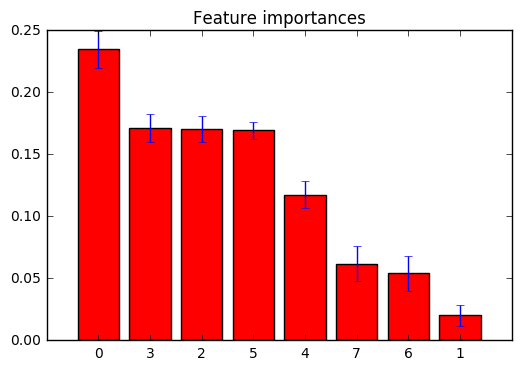

In [12]:
def feature_importance(path):

    df = pd.read_csv(path, sep=',', header=0)
    

    print(df.columns.tolist())

    df = df.replace([np.inf, -np.inf], np.nan)

    df = df.replace([np.inf, -np.inf], 0)
    
    df.fillna(0, inplace=True)
    
    df.drop_duplicates()
   
    X = df[['price', 'overall', 'sentimentPolarity', 'sentimentSubjectivity', 'sentenceCount', 
                  'wordCount', 'helpful1', 'helpful2']]
    
    #X = scale(X)

    y = df[['salesRank2']]
    
    #y = scale(y)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3)

    forest = ExtraTreesClassifier()

    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
        
    return

feature_importance(r'C:\Users\Tushar pc\Desktop\HackOnData\Amazon_imp.csv')

As it can be seen from the bar chart above, price happens to be one of the most significant features in predicting sales rank. 